In [2]:
from IPython.core.display import display, HTML
import nbimporter
from mecdb import MEC
import sklearn.cluster as cls
import numpy as np

def show(doc, w=120):
    style = 'width: ' + str(w) + 'px;'
    try:
        url = doc['image']
    except KeyError:
        url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
    display(HTML('<img src="' + url + '" style="' + style + '">'))

    
def show_grid(docs, w=120, row=6):
    style = 'width: ' + str(w) + 'px; display: inline;'
    html_row = []
    for doc in docs:
        try:
            url = doc['image']
        except KeyError:
            url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
        html_row.append('<img src="' + url + '" style="' + style + '">')
        if len(html_row) == row:
            display(HTML("".join(html_row)))
            html_row = []
    display(HTML("".join(html_row)))
    

dataset = 'calzedoniajson_items_0'
mec = MEC(dataset)

Importing Jupyter notebook from mecdb.ipynb


In [3]:
M = mec.dataset_matrix(size=len(mec.dictionary))
A = M.T

In [6]:
B = np.dot(A, M)

In [7]:
sorted_tags = sorted(mec.dictionary.items(), key=lambda x: x[1])
tags_list = map(lambda x: x[0], sorted_tags)

In [8]:
Ut, sigmas, Vt = np.linalg.svd(A, full_matrices=False)

St = np.diag(sigmas)
P1 = np.dot(Ut, St)
P2 = np.dot(P1, Vt)

print np.allclose(P2, A)

True


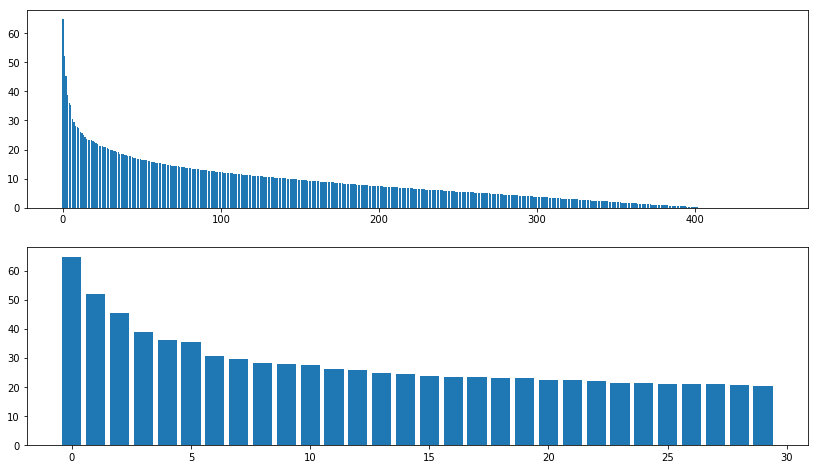

In [20]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axes[0].bar(range(0, len(sigmas)), sigmas)
axes[1].bar(range(0, 30), sigmas[:30])
plt.show()

In [22]:
# In qualche modo definiamo il numero di topic
k = 10

In [28]:
Skt = np.diag(sigmas[:k])
Ukt = Ut[:,:k]
Vkt = Vt.T[:,:k].T

Pk1 = np.dot(Ukt, Skt)
Pk2 = np.dot(Pk1, Vkt)

Terms = np.dot(Ukt, Skt)
Docs = np.dot(Skt, Vkt)

print Terms.shape
print Docs.shape

(694, 10)
(10, 450)


In [46]:
tgroups = {}
n_elem = 10

for i, line in enumerate(Terms.T):
    sorted_values = sorted(enumerate(line), key=lambda x: -np.abs(x[1]))[:n_elem]
    tgroups[i] = map(lambda x: tags_list[x[0]], sorted_values)

for k, v in tgroups.items():
    print k, ": ", ", ".join(v)

0 :  woman, sexy, fashion, pretty, girl, young, glamour, model, beautiful, summer
1 :  vacation, beach, sea, water, sand, ocean, travel, tropical, summer, leisure
2 :  text, business, design, desktop, symbol, no person, education, sign, illustration, success
3 :  lingerie, erotic, pantie, seduction, brassiere, people, thin, underwear, wear, one
4 :  exercise, active, strength, fitness, sport, health, brawny, gymnastics, athlete, balance
5 :  color, thread, no person, textile, bright, decoration, gift, fabric, accessory, celebration
6 :  street, cute, festival, man, music, city, performance, pantie, people, attractive
7 :  illustration, character, funny, art, far-out, sketch, simple, scribble, celebration, cockamamie
8 :  footwear, person, shoe, foot, attractive, funny, character, sneakers, contemporary, beautiful
9 :  indoors, family, festival, music, performance, furniture, concert, light, sofa, room


In [53]:
m_elem = 10

for i, line in enumerate(Docs):
    sorted_values = sorted(enumerate(line), key=lambda x: -np.abs(x[1]))[:m_elem]
    # dgroups[i] = map(lambda x: tags_list[x[0]], sorted_values)
    print "Topic ", i, ": ", ', '.join(tgroups[i])
    show_grid([ mec.docs[x[0]] for x in sorted_values])
    

Topic  0 :  woman, sexy, fashion, pretty, girl, young, glamour, model, beautiful, summer


Topic  1 :  vacation, beach, sea, water, sand, ocean, travel, tropical, summer, leisure


Topic  2 :  text, business, design, desktop, symbol, no person, education, sign, illustration, success


Topic  3 :  lingerie, erotic, pantie, seduction, brassiere, people, thin, underwear, wear, one


Topic  4 :  exercise, active, strength, fitness, sport, health, brawny, gymnastics, athlete, balance


Topic  5 :  color, thread, no person, textile, bright, decoration, gift, fabric, accessory, celebration


Topic  6 :  street, cute, festival, man, music, city, performance, pantie, people, attractive


Topic  7 :  illustration, character, funny, art, far-out, sketch, simple, scribble, celebration, cockamamie


Topic  8 :  footwear, person, shoe, foot, attractive, funny, character, sneakers, contemporary, beautiful


Topic  9 :  indoors, family, festival, music, performance, furniture, concert, light, sofa, room
